In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
us_history_df = pd.read_csv("US History All House and Senate Members.csv")
us_history_df

,congress,chamber,icpsr,state_icpsr,district_code,state_abbrev,party_code,occupancy,last_means,bioname,...,died,nominate_dim1,nominate_dim2,nominate_log_likelihood,nominate_geo_mean_probability,nominate_number_of_votes,nominate_number_of_errors,conditional,nokken_poole_dim1,nokken_poole_dim2
0,1,President,99869,99,0,USA,5000,NaN,NaN,"WASHINGTON, George",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,House,379,44,2,GA,4000,0.0,1.0,"BALDWIN, Abraham",...,1807.0,-0.165,-0.373,-28.55029,0.75800,103.0,12.0,NaN,-0.429,-0.817
2,1,House,4854,44,1,GA,4000,0.0,1.0,"JACKSON, James",...,1806.0,-0.320,-0.181,-24.89986,0.77600,98.0,9.0,NaN,-0.559,-0.052
3,1,House,6071,44,3,GA,4000,0.0,1.0,"MATHEWS, George",...,1812.0,-0.428,-0.317,-12.62728,0.88000,99.0,2.0,NaN,-0.413,-0.232
4,1,House,1538,52,6,MD,5000,0.0,1.0,"CARROLL, Daniel",...,1796.0,0.116,-0.740,-23.47008,0.78300,96.0,11.0,NaN,0.114,-0.779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50479,118,Senate,40915,56,0,WV,100,NaN,NaN,"MANCHIN, Joe, III",...,NaN,-0.060,0.413,-1.80162,0.92137,22.0,0.0,NaN,-0.017,-0.458
50480,118,Senate,29940,25,0,WI,100,NaN,NaN,"BALDWIN, Tammy",...,NaN,-0.493,-0.136,-0.07699,0.99651,22.0,0.0,NaN,-0.017,-0.458
50481,118,Senate,41111,25,0,WI,200,NaN,NaN,"JOHNSON, Ron",...,NaN,0.626,-0.159,-0.77952,0.96519,22.0,0.0,NaN,0.434,0.901
50482,118,Senate,20953,68,0,WY,200,NaN,NaN,"LUMMIS, Cynthia M.",...,NaN,0.691,-0.357,-0.82735,0.96137,21.0,0.0,NaN,0.792,0.610


In [6]:
rows_columns=csv.shape
print(rows_columns)
print('rows',rows_columns[0])
print('columns',rows_columns[1])

(50484, 22)
rows 50484
columns 22


/var/folders/bs/sb6b63zn6833k65g_3_ntd6c0000gn/T/ipykernel_75310/2823427447.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


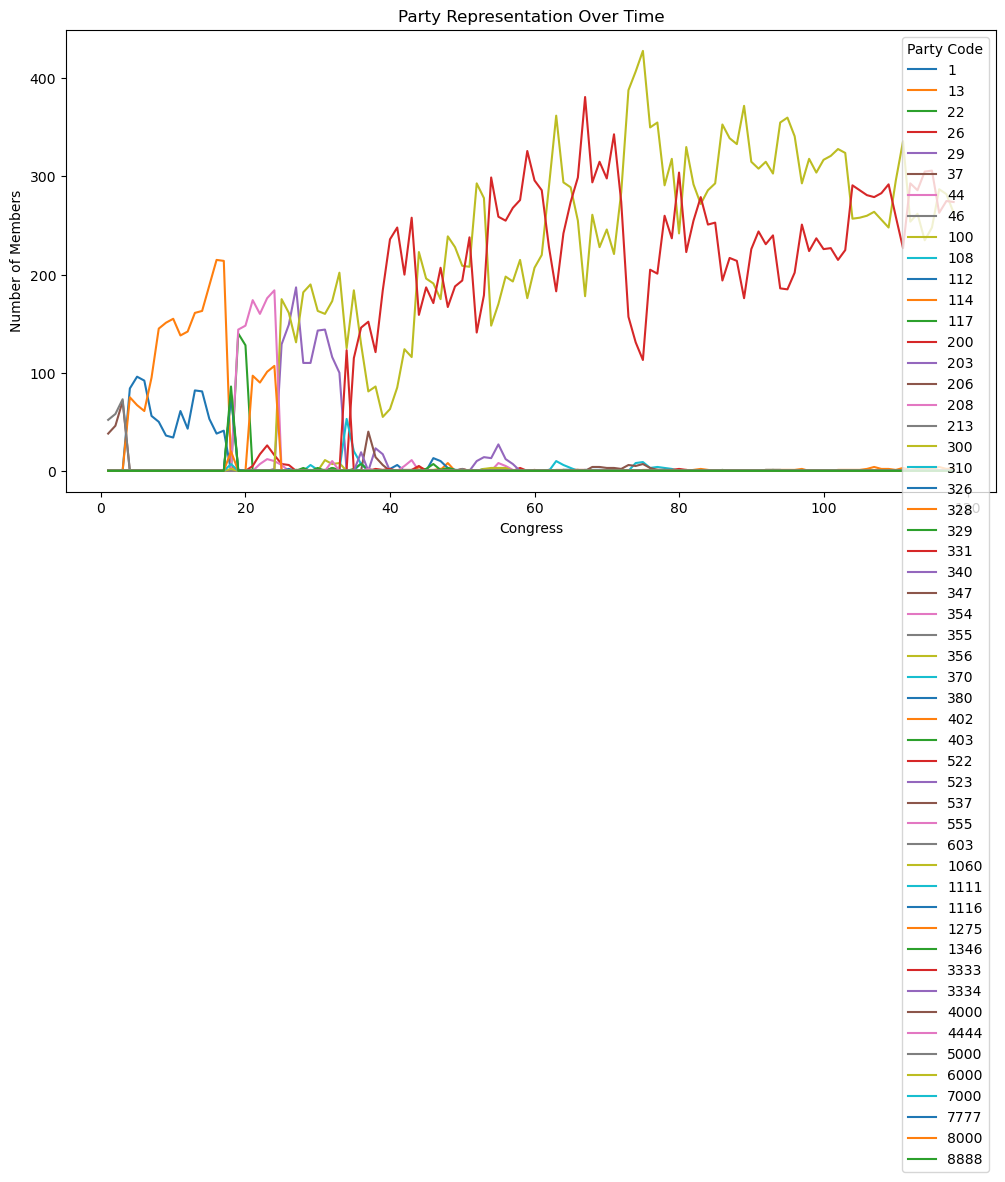

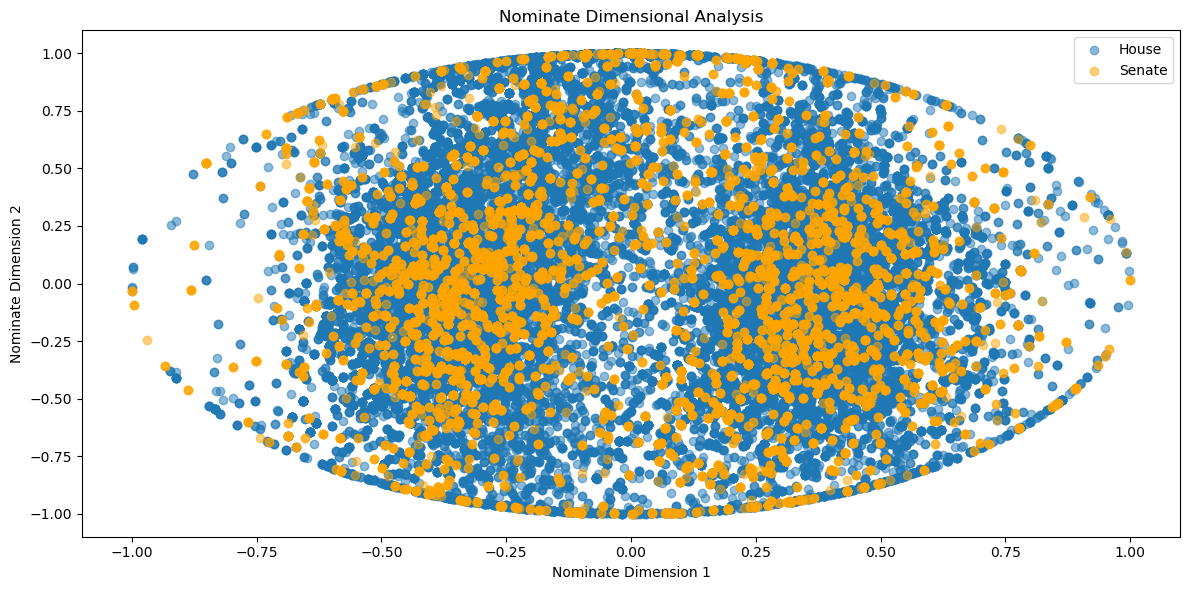

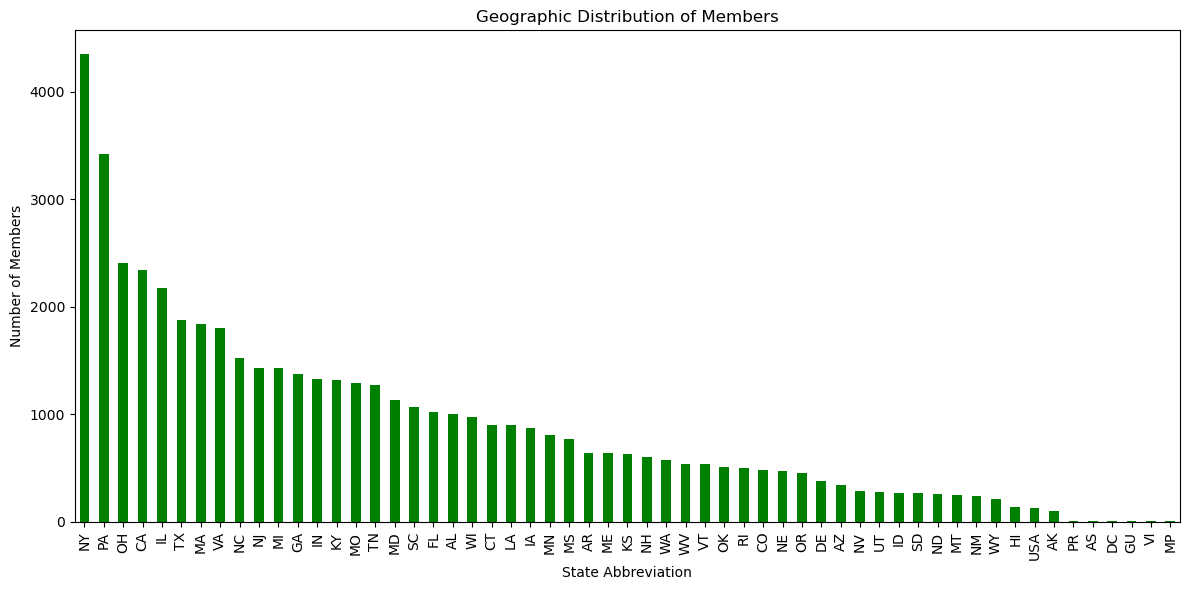

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Party Representation Over Time
party_representation = us_history_df.groupby(['congress', 'party_code']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
party_representation.plot(kind='line', ax=plt.gca())
plt.title("Party Representation Over Time")
plt.xlabel("Congress")
plt.ylabel("Number of Members")
plt.legend(title="Party Code")
plt.tight_layout()
plt.show()

# 2. Nominate Dimensional Analysis
house_data = us_history_df[us_history_df['chamber'] == 'House']
senate_data = us_history_df[us_history_df['chamber'] == 'Senate']

plt.figure(figsize=(12, 6))
plt.scatter(house_data['nominate_dim1'], house_data['nominate_dim2'], alpha=0.5, label='House')
plt.scatter(senate_data['nominate_dim1'], senate_data['nominate_dim2'], alpha=0.5, label='Senate', color='orange')
plt.title("Nominate Dimensional Analysis")
plt.xlabel("Nominate Dimension 1")
plt.ylabel("Nominate Dimension 2")
plt.legend()
plt.tight_layout()
plt.show()

# 3. Geographic Distribution
state_counts = us_history_df['state_abbrev'].value_counts()

plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar', color='green', ax=plt.gca())
plt.title("Geographic Distribution of Members")
plt.xlabel("State Abbreviation")
plt.ylabel("Number of Members")
plt.tight_layout()
plt.show()


### Visualization Descriptions

1. **Party Representation Over Time**:
   - **Description**: This line chart illustrates the evolution of party representation in Congress across different sessions. Each line corresponds to a specific party (`party_code`), showing how the number of members associated with each party has changed over time (`congress`).
   - **Purpose**: To track historical trends in party dominance or fluctuations in membership, offering insights into the political shifts within the legislative branch.

2. **Nominate Dimensional Analysis**:
   - **Description**: This scatter plot visualizes ideological scores (`nominate_dim1` vs. `nominate_dim2`) for members of the House and Senate. Points are color-coded by chamber: blue for the House and orange for the Senate.
   - **Purpose**: To analyze and compare the ideological clustering of legislators within and across chambers, providing a snapshot of political alignment and diversity of thought.

3. **Geographic Distribution**:
   - **Description**: This bar chart displays the number of congressional members from each state (`state_abbrev`). The height of each bar represents the total count of legislators from the respective state.
   - **Purpose**: To highlight state-wise representation in Congress, which can reveal disparities in representation or trends in political participation at the state level.

Let me know if you want these descriptions added to the code comments or elsewhere.

In [16]:
import pandas as pd

# 1. Distribution of Members by Party Code
party_distribution = us_history_df['party_code'].value_counts()
print("Party Distribution:")
print(party_distribution)



Party Distribution:
party_code
100     23417
200     19878
13       1976
29       1190
555       986
1         847
1275      395
22        268
5000      183
4000      155
3333      123
310        89
8888       86
340        83
7777       79
1346       78
26         77
328        66
206        60
370        48
203        40
329        40
537        39
44         35
326        28
300        26
331        23
8000       20
3334       19
208        16
354        14
112        13
4444       12
1060       11
114         9
108         8
522         7
380         7
7000        7
347         3
46          3
403         3
356         2
355         2
117         2
37          2
603         2
6000        2
1116        1
213         1
1111        1
523         1
402         1
Name: count, dtype: int64
